# Compare new projections with reference projections

Useful to test code after some development

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!!! NOT MADE YET, THIS IS JUST COPY/PASTE OF CompProj.ipynb
data_dir = '../outputs/'
namelists =  ['AR5_glo', 'loc_TempAll_odyn_CMIP5', 'KNMI14']
sce ='rcp85'

proj_ds_list = []
for proj in namelists:
    proj_ds_list.append(xr.open_dataset(f'{data_dir}SeaLevelPerc_{proj}_{sce}.nc'))


### Compare the percentiles in 2100

In [4]:
proj_ds_list[0].perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'perc_ts' (percentiles: 11)>
array([ 46.417265,  53.812644,  57.974413,  61.870397,  63.269969,  74.085338,
        85.711005,  87.348261,  92.197146,  97.879414, 109.881641])
Coordinates:
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
    time         int64 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

In [6]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['perc_ts'])
        tot_df = tot_df.rename(columns={'perc_ts': proj})
    else:
        tot_df[proj] = df['perc_ts']
tot_df

,AR5_glo,loc_TempAll_odyn_CMIP5
percentiles,,
1,46.417265,37.083933
5,53.812644,47.022677
10,57.974413,52.374897
17,61.870397,57.333798
20,63.269969,59.043910
50,74.085338,72.404487
80,85.711005,87.036729
83,87.348261,89.135803
90,92.197146,95.499304


### Compare the time series of individual contributors

In [7]:
nb_proc = len(proj_ds_list[0].proc)
perc = 50

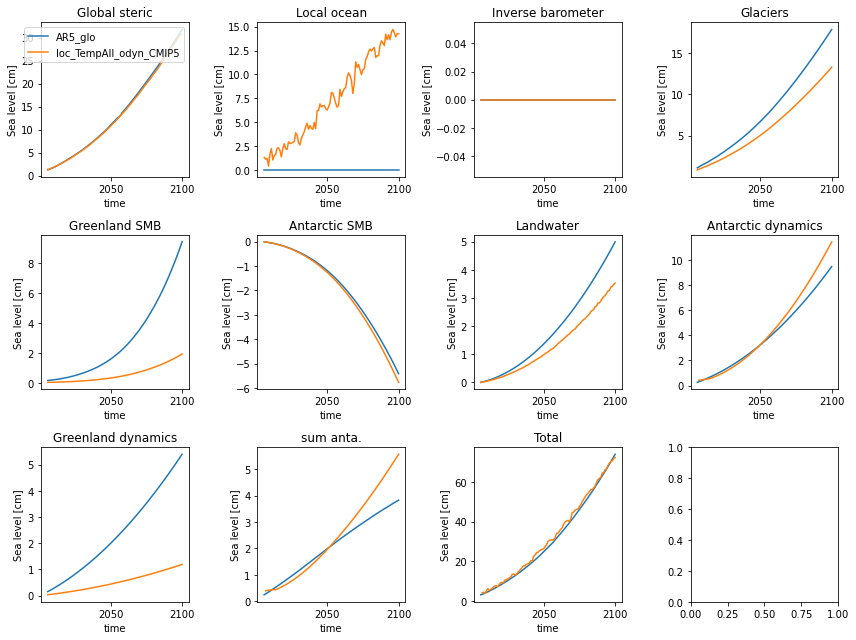

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()